In [1]:
import os
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing import image 

In [2]:
img1=cv2.imread(r'C:\Users\Rohit94\Documents\project_2023\Skin Cancer\archive (3)\train\benign\3.jpg')
print(img1)

[[[134 111 196]
  [139 115 199]
  [138 113 199]
  ...
  [123  96 189]
  [119  91 187]
  [117  90 184]]

 [[135 107 197]
  [136 111 197]
  [140 114 198]
  ...
  [117  90 186]
  [117  85 186]
  [115  82 186]]

 [[130  99 196]
  [135 107 197]
  [137 112 200]
  ...
  [105  84 177]
  [108  84 178]
  [106  83 181]]

 ...

 [[108 102 183]
  [103  99 181]
  [106 100 182]
  ...
  [123 102 181]
  [121 103 180]
  [125 108 182]]

 [[106 100 182]
  [107  96 182]
  [103  99 181]
  ...
  [120 104 182]
  [119 103 180]
  [124 107 181]]

 [[107 100 181]
  [106  99 180]
  [104 100 182]
  ...
  [120 106 177]
  [121 104 177]
  [125 106 179]]]


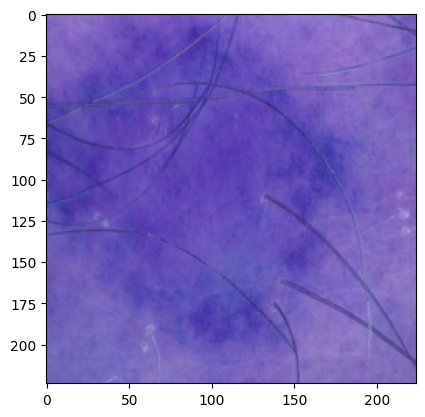

In [3]:
#previewing the image using open cv 
plt.imshow(img1)

In [4]:
#evaluating the size of the image 
print("the shape of the image ")
print(img1.shape)
#so we can see that the image has height=64 px , width=64 px , channel= 3
#so the image is an rgb image 

the shape of the image 
(224, 224, 3)


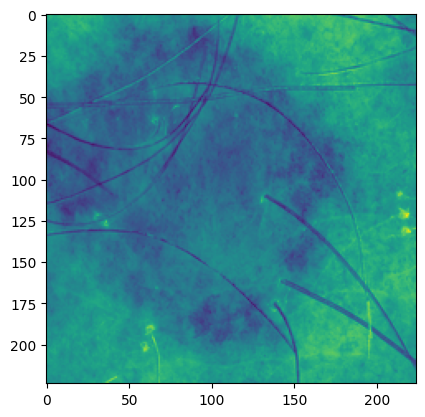

In [5]:
#converting the rgb image to an grayscale image 
img_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [6]:
#checking the shape of the gray image 
print("the shape of the converted image")
img_gray.shape
#here we can see that there is only 64,64 which describes the height and width and there is only one channel 

the shape of the converted image


(224, 224)

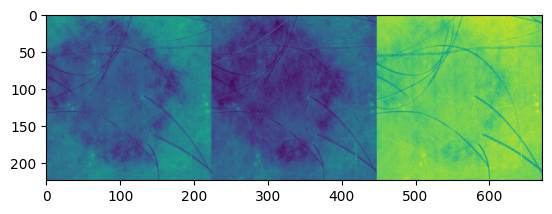

In [7]:
#playing with the colors of the image 
import numpy as np
imgblue=img1[:,:,0]
imggreen=img1[:,:,1]
imgred=img1[:,:,2]
new_image=np.hstack((imgblue,imggreen,imgred))
plt.imshow(new_image)

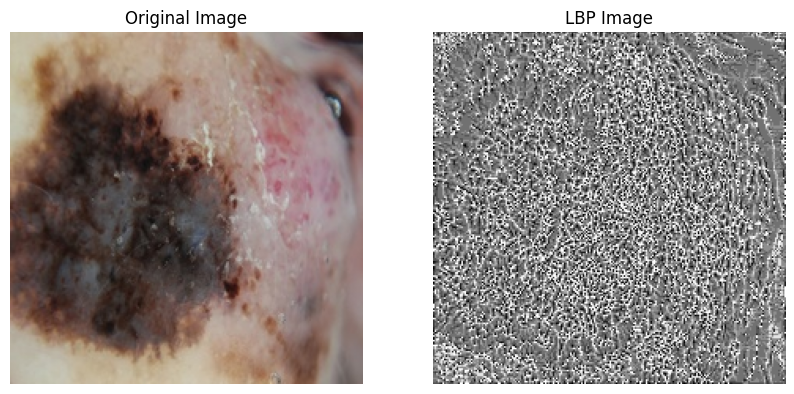

In [10]:
import cv2
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

def lbp_features(image, P=8, R=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, P, R, method="uniform")
    return lbp



# Load the image
image_path = r'C:\Users\Rohit94\Documents\project_2023\Skin Cancer\archive (3)\data\train\malignant\53.jpg'
image = cv2.imread(image_path)

# Apply LBP feature extraction
lbp_image = lbp_features(image)

# Display the original and LBP images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('LBP Image')
plt.imshow(lbp_image, cmap='gray')
plt.axis('off')

plt.show()


In [15]:
import cv2
import numpy as np
import os
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

def lbp_features(image, P=8, R=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, P, R, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

def load_data(image_dir):
    images = []
    labels = []
    for label in os.listdir(image_dir):
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (128, 128))
            lbp_hist = lbp_features(image)
            images.append(lbp_hist)
            labels.append(label)
    return np.array(images), np.array(labels)


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [21]:
images_dir = r"C:\Users\Rohit94\Documents\project_2023\Skin Cancer\archive (3)\data\train"

In [22]:
batch_size = 32
img_height = 224
img_width = 224

In [23]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2637 files belonging to 2 classes.
Using 2110 files for training.


In [24]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2637 files belonging to 2 classes.
Using 527 files for validation.


In [25]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


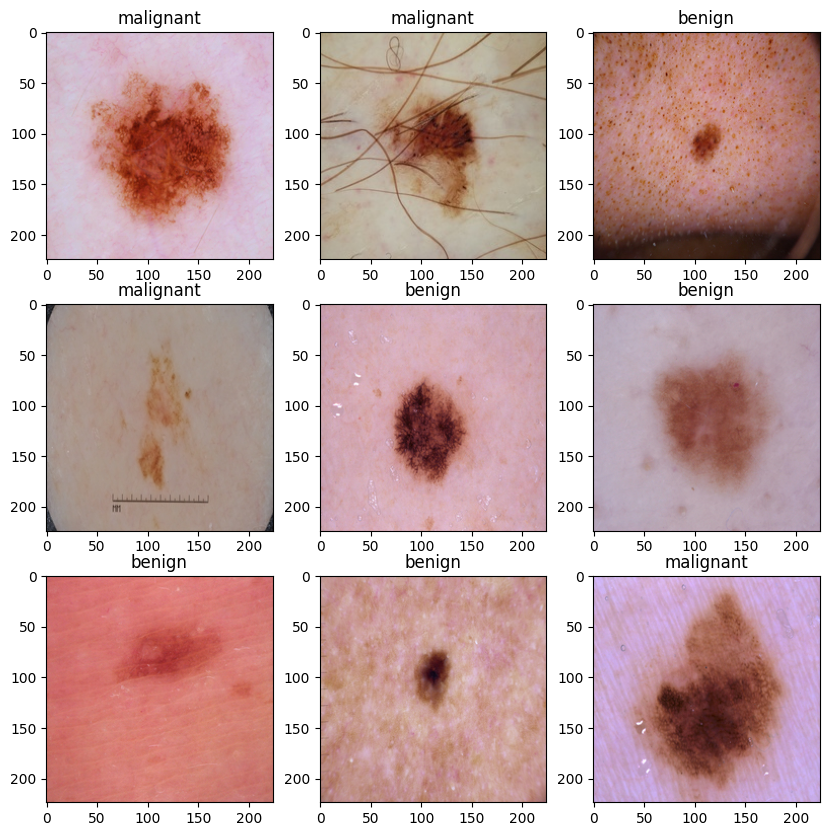

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [27]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [28]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [29]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.027450982 0.8352942


In [30]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [33]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
66/66 [==============================] - 31s 446ms/step - loss: 0.6713 - accuracy: 0.6730 - val_loss: 0.4955 - val_accuracy: 0.7913
Epoch 2/15
66/66 [==============================] - 29s 439ms/step - loss: 0.4504 - accuracy: 0.7806 - val_loss: 0.4585 - val_accuracy: 0.7381
Epoch 3/15
66/66 [==============================] - 29s 445ms/step - loss: 0.4296 - accuracy: 0.7834 - val_loss: 0.4880 - val_accuracy: 0.6869
Epoch 4/15
66/66 [==============================] - 29s 443ms/step - loss: 0.4256 - accuracy: 0.7844 - val_loss: 0.3874 - val_accuracy: 0.8349
Epoch 5/15
66/66 [==============================] - 29s 438ms/step - loss: 0.3850 - accuracy: 0.8057 - val_loss: 0.4084 - val_accuracy: 0.8027
Epoch 6/15
66/66 [==============================] - 28s 430ms/step - loss: 0.3664 - accuracy: 0.8171 - val_loss: 0.3655 - val_accuracy: 0.8273
Epoch 7/15
66/66 [==============================] - 29s 432ms/step - loss: 0.3443 - accuracy: 0.8289 - val_loss: 0.3570 - val_accuracy: 0.8311

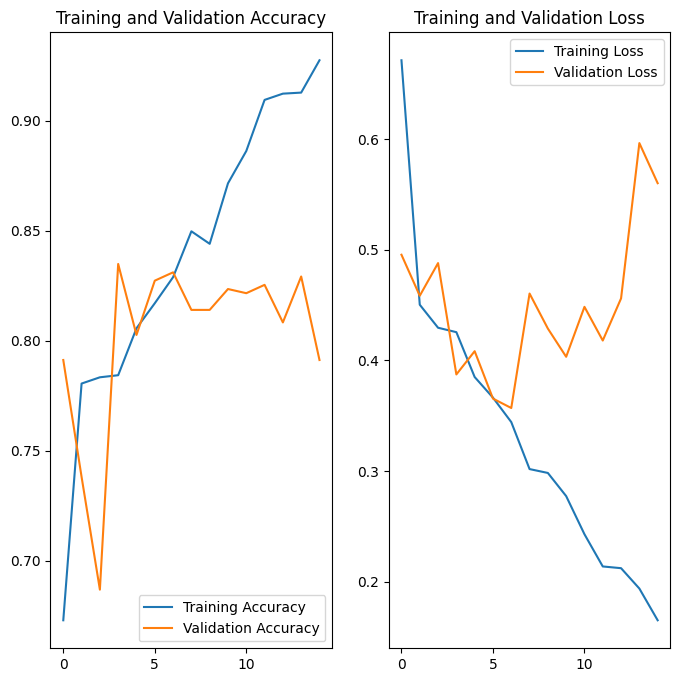

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    images_dir, # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 2637 images belonging to 2 classes.


C:\Users\Rohit94\AppData\Local\Temp\ipykernel_28664\2664318057.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


In [37]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [38]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

      benign       0.83      0.98      0.90      1440
   malignant       0.97      0.76      0.85      1197

    accuracy                           0.88      2637
   macro avg       0.90      0.87      0.88      2637
weighted avg       0.89      0.88      0.88      2637



In [39]:
model.save("SkinCancer.h5")

In [40]:
from tensorflow import keras
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np

In [41]:
trdata=ImageDataGenerator()
traindata=trdata.flow_from_directory(directory=r'C:\Users\Rohit94\Documents\project_2023\Skin Cancer\archive (3)\train',target_size=(224,224))
tsdata=ImageDataGenerator()
testdata=tsdata.flow_from_directory(directory=r'C:\Users\Rohit94\Documents\project_2023\Skin Cancer\archive (3)\test',target_size=(224,224))

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [42]:
#importing VGG16 algorithm 
VGG=keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable=False

In [43]:
model=keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=2,activation='softmax')
    
])

In [44]:
model.compile(optimizer='adam',loss=tf.losses.CosineSimilarity(),metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
hist=model.fit_generator(steps_per_epoch=20,generator=traindata,validation_data=testdata,validation_steps=3,epochs=15)

C:\Users\Rohit94\AppData\Local\Temp\ipykernel_28664\2120979195.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(steps_per_epoch=20,generator=traindata,validation_data=testdata,validation_steps=3,epochs=15)


Epoch 1/15
20/20 [==============================] - 88s 4s/step - loss: -0.5236 - accuracy: 0.5234 - val_loss: -0.6042 - val_accuracy: 0.6042
Epoch 2/15
20/20 [==============================] - 90s 5s/step - loss: -0.5172 - accuracy: 0.5172 - val_loss: -0.5208 - val_accuracy: 0.5208
Epoch 3/15
20/20 [==============================] - 92s 5s/step - loss: -0.5672 - accuracy: 0.5672 - val_loss: -0.5417 - val_accuracy: 0.5417
Epoch 4/15
20/20 [==============================] - 88s 4s/step - loss: -0.5516 - accuracy: 0.5516 - val_loss: -0.5521 - val_accuracy: 0.5521
Epoch 5/15
20/20 [==============================] - 87s 4s/step - loss: -0.5094 - accuracy: 0.5094 - val_loss: -0.4792 - val_accuracy: 0.4792
Epoch 6/15
20/20 [==============================] - 86s 4s/step - loss: -0.5531 - accuracy: 0.5531 - val_loss: -0.5208 - val_accuracy: 0.5208
Epoch 7/15
20/20 [==============================] - 87s 4s/step - loss: -0.5312 - accuracy: 0.5312 - val_loss: -0.5208 - val_accuracy: 0.5208
Epoch 